# Final Project: Human Action Recognition

In [ ]:
!unzip "Human Action Recognition.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Human Action Recognition/train/Image_4102.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_4102.jpg  
  inflating: Human Action Recognition/train/Image_2573.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_2573.jpg  
  inflating: Human Action Recognition/train/Image_11392.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_11392.jpg  
  inflating: Human Action Recognition/train/Image_6715.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_6715.jpg  
  inflating: Human Action Recognition/train/Image_9426.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_9426.jpg  
  inflating: Human Action Recognition/train/Image_8738.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_8738.jpg  
  inflating: Human Action Recognition/train/Image_6073.jpg  
  inflating: __MACOSX/Human Action Recognition/train/._Image_6073.jpg  
  inflating: Hum

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from PIL import Image

import tensorflow as tf
from tensorflow import keras
import torch

import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 1} )
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

In [ ]:
# process the data
dataset = pd.read_csv("Human Action Recognition/Training_set.csv") # testing set does not have labels
folder = glob.glob("Human Action Recognition/train/*")
filename = dataset["filename"]
data_labels = dataset["label"]

images = []
labels = []
length = len(folder)
for i in range(length-1):
  img = Image.open("Human Action Recognition/train/" + filename[i])
  images.append(np.asarray(img.resize((160,160))))
  labels.append(data_labels[i])



In [ ]:
images_np = np.asarray(images)
labels_num, key = pd.factorize(np.asarray(data_labels))

y_train = keras.utils.to_categorical(np.asarray(labels_num))

#split dataset into training and validation
images_train = images_np[:10000]
images_validate = images_np[10000:]

labels_train = y_train[:10000]
labels_validate = y_train[10000:]


In [ ]:
# Specify Basic CNN model
CNN_basic_model = tf.keras.models.Sequential()
CNN_basic_model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_basic_model.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_basic_model.add(keras.layers.Flatten())
CNN_basic_model.add(keras.layers.Dense(128, activation = 'relu'))
CNN_basic_model.add(keras.layers.Dense(15, activation = 'softmax'))

CNN_basic_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = CNN_basic_model.fit(images_train, labels_train, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

Epoch 1/50
313/313 [==============================] - 9s 23ms/step - loss: 362.3840 - accuracy: 0.1011 - val_loss: 4.3469 - val_accuracy: 0.1354
Epoch 2/50
313/313 [==============================] - 6s 20ms/step - loss: 2.3445 - accuracy: 0.3628 - val_loss: 3.5505 - val_accuracy: 0.1546
Epoch 3/50
313/313 [==============================] - 6s 20ms/step - loss: 1.1462 - accuracy: 0.6765 - val_loss: 3.9070 - val_accuracy: 0.1700
Epoch 4/50
313/313 [==============================] - 6s 19ms/step - loss: 0.7362 - accuracy: 0.8373 - val_loss: 4.5134 - val_accuracy: 0.1631
Epoch 5/50
313/313 [==============================] - 6s 20ms/step - loss: 0.5073 - accuracy: 0.9050 - val_loss: 5.2004 - val_accuracy: 0.1604
Epoch 6/50
313/313 [==============================] - 6s 19ms/step - loss: 0.3640 - accuracy: 0.9370 - val_loss: 5.9712 - val_accuracy: 0.1665
Epoch 7/50
313/313 [==============================] - 6s 21ms/step - loss: 0.2860 - accuracy: 0.9532 - val_loss: 6.6045 - val_accuracy: 0.16

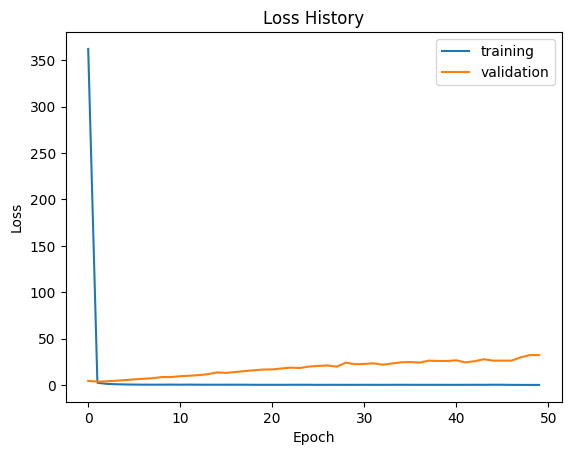

In [ ]:
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

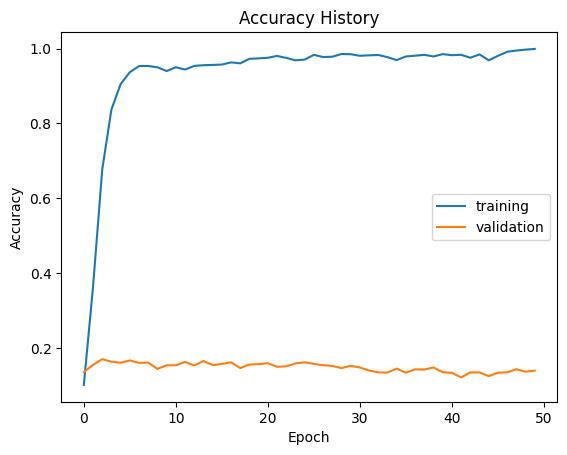

In [ ]:
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# Specify Improved CNN model
CNN_v2 = tf.keras.models.Sequential()
CNN_v2.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_v2.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_v2.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_v2.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_v2.add(keras.layers.Flatten())
CNN_v2.add(keras.layers.Dense(512, activation = 'relu'))
CNN_v2.add(keras.layers.Dropout(0.2))
CNN_v2.add(keras.layers.Dense(256, activation = 'relu'))
CNN_v2.add(keras.layers.Dropout(0.2))
CNN_v2.add(keras.layers.Dense(15, activation = 'softmax'))

CNN_v2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = CNN_v2.fit(images_train, labels_train, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

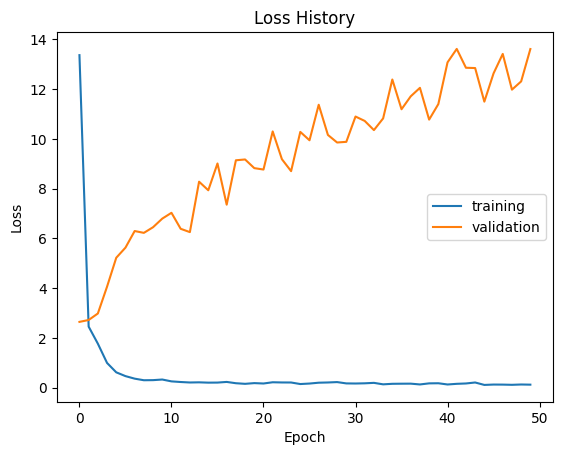

In [ ]:
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

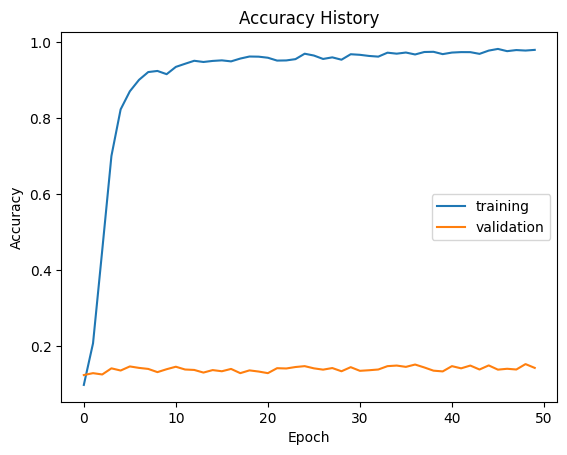

In [ ]:
accuracy = history3.history["accuracy"]
val_accuracy = history3.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# Specify Improved CNN model with data augmentation
CNN_v3 = tf.keras.models.Sequential()
CNN_v3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_v3.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_v3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_v3.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_v3.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_v3.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_v3.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (160,160,3)))
CNN_v3.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
CNN_v3.add(keras.layers.Dropout(0.2))
CNN_v3.add(keras.layers.Flatten())
CNN_v3.add(keras.layers.Dense(512, activation = 'relu'))
CNN_v3.add(keras.layers.Dense(256, activation = 'relu'))
CNN_v3.add(keras.layers.Dense(64, activation = 'relu'))
CNN_v3.add(keras.layers.Dense(15, activation = 'softmax'))

CNN_v3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1)

In [ ]:
batch_size = 32
train_generator = datagen.flow(images_train, labels_train, batch_size=batch_size)

In [ ]:
history4 = CNN_v3.fit(train_generator, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

Epoch 1/50
313/313 [==============================] - 64s 201ms/step - loss: 2.6624 - accuracy: 0.1039 - val_loss: 2.6584 - val_accuracy: 0.0977
Epoch 2/50
313/313 [==============================] - 63s 202ms/step - loss: 2.6249 - accuracy: 0.1185 - val_loss: 2.5474 - val_accuracy: 0.1435
Epoch 3/50
313/313 [==============================] - 63s 200ms/step - loss: 2.5459 - accuracy: 0.1497 - val_loss: 2.4675 - val_accuracy: 0.1708
Epoch 4/50
313/313 [==============================] - 65s 207ms/step - loss: 2.4874 - accuracy: 0.1710 - val_loss: 2.4226 - val_accuracy: 0.1969
Epoch 5/50
313/313 [==============================] - 62s 197ms/step - loss: 2.4382 - accuracy: 0.1866 - val_loss: 2.3609 - val_accuracy: 0.2050
Epoch 6/50
313/313 [==============================] - 62s 199ms/step - loss: 2.3628 - accuracy: 0.2161 - val_loss: 2.2525 - val_accuracy: 0.2546
Epoch 7/50
313/313 [==============================] - 63s 199ms/step - loss: 2.3194 - accuracy: 0.2329 - val_loss: 2.2301 - val_ac

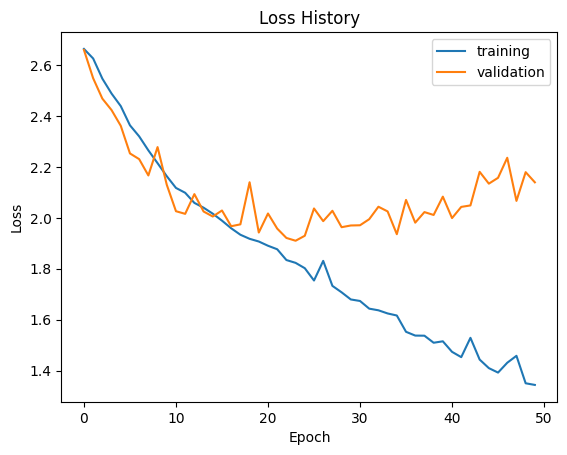

In [ ]:
loss = history4.history["loss"]
val_loss = history4.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

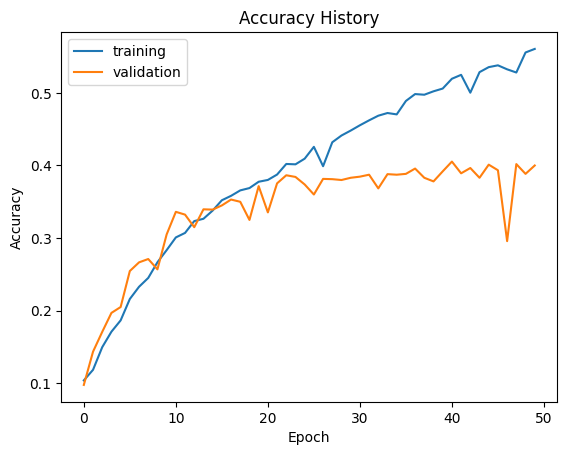

In [ ]:
accuracy = history4.history["accuracy"]
val_accuracy = history4.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# Specify VGG model
vgg16 = tf.keras.models.Sequential()

vgg_pretrained = tf.keras.applications.VGG16(include_top = False, input_shape = (160,160, 3), pooling = 'avg', classes = len(key), weights = "imagenet")

for layer in vgg_pretrained.layers:
  layer.trainable = False

vgg16.add(vgg_pretrained)
vgg16.add(keras.layers.Flatten())
vgg16.add(keras.layers.Dense(512, activation = 'relu'))
vgg16.add(keras.layers.Dense(256, activation = 'relu'))
vgg16.add(keras.layers.Dense(15, activation = 'softmax'))

vgg16.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
history = vgg16.fit(images_train, labels_train, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

Epoch 1/50
313/313 [==============================] - 43s 117ms/step - loss: 1.9333 - accuracy: 0.4358 - val_loss: 1.6065 - val_accuracy: 0.4865
Epoch 2/50
313/313 [==============================] - 27s 87ms/step - loss: 1.2721 - accuracy: 0.5792 - val_loss: 1.4769 - val_accuracy: 0.5400
Epoch 3/50
313/313 [==============================] - 28s 88ms/step - loss: 1.0166 - accuracy: 0.6647 - val_loss: 1.4747 - val_accuracy: 0.5396
Epoch 4/50
313/313 [==============================] - 28s 89ms/step - loss: 0.8005 - accuracy: 0.7325 - val_loss: 1.5402 - val_accuracy: 0.5273
Epoch 5/50
313/313 [==============================] - 28s 88ms/step - loss: 0.6022 - accuracy: 0.7975 - val_loss: 1.6312 - val_accuracy: 0.5500
Epoch 6/50
313/313 [==============================] - 32s 103ms/step - loss: 0.4334 - accuracy: 0.8543 - val_loss: 1.8749 - val_accuracy: 0.5500
Epoch 7/50
313/313 [==============================] - 28s 89ms/step - loss: 0.3080 - accuracy: 0.8965 - val_loss: 1.9732 - val_accurac

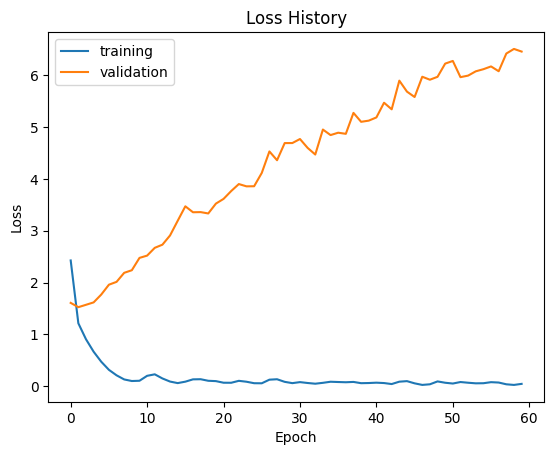

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

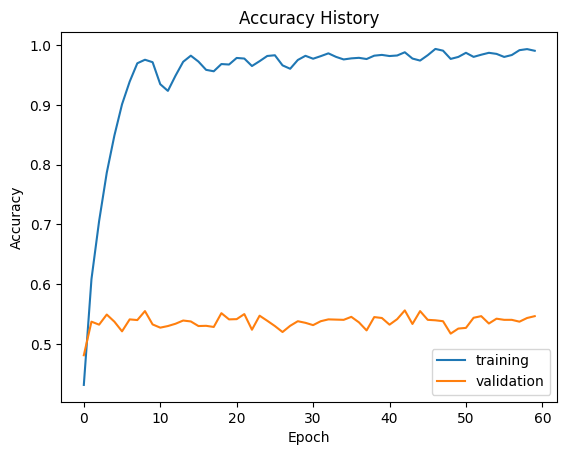

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#resnet50
resnet50 = tf.keras.models.Sequential()

resnet50_pretrained = tf.keras.applications.ResNet50(include_top = False, input_shape = (160,160, 3), pooling = 'avg', classes = len(key), weights = "imagenet")

for layer in resnet50_pretrained.layers:
  layer.trainable = False

resnet50.add(resnet50_pretrained)
resnet50.add(keras.layers.Flatten())
resnet50.add(keras.layers.Dense(512, activation = 'relu'))
resnet50.add(keras.layers.Dense(15, activation = 'softmax'))

resnet50.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
history2 = resnet50.fit(images_train, labels_train, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

Epoch 1/50
313/313 [==============================] - 30s 77ms/step - loss: 1.5987 - accuracy: 0.4991 - val_loss: 1.4746 - val_accuracy: 0.5112
Epoch 2/50
313/313 [==============================] - 21s 66ms/step - loss: 1.1716 - accuracy: 0.6150 - val_loss: 1.3062 - val_accuracy: 0.5673
Epoch 3/50
313/313 [==============================] - 22s 70ms/step - loss: 0.9781 - accuracy: 0.6756 - val_loss: 1.2998 - val_accuracy: 0.5858
Epoch 4/50
313/313 [==============================] - 21s 67ms/step - loss: 0.8172 - accuracy: 0.7269 - val_loss: 1.3828 - val_accuracy: 0.5723
Epoch 5/50
313/313 [==============================] - 21s 67ms/step - loss: 0.6606 - accuracy: 0.7803 - val_loss: 1.4080 - val_accuracy: 0.5750
Epoch 6/50
313/313 [==============================] - 22s 70ms/step - loss: 0.5377 - accuracy: 0.8228 - val_loss: 1.4277 - val_accuracy: 0.5862
Epoch 7/50
313/313 [==============================] - 21s 67ms/step - loss: 0.4037 - accuracy: 0.8709 - val_loss: 1.5713 - val_accuracy:

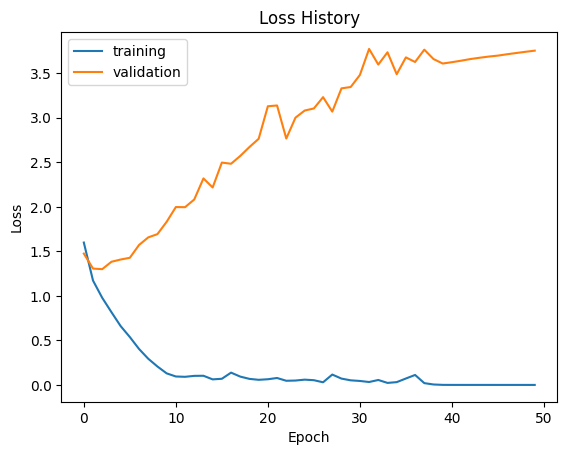

In [ ]:
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

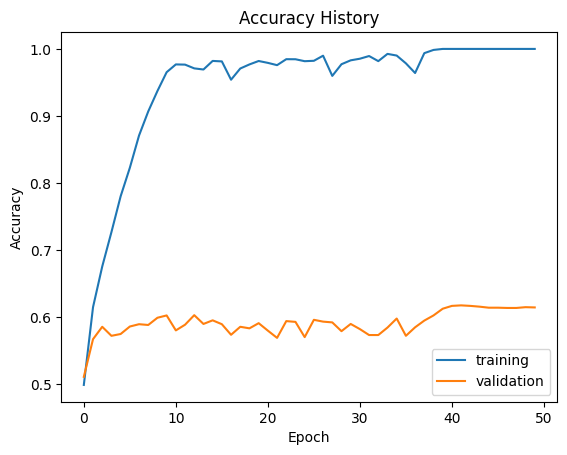

In [ ]:
accuracy = history2.history["accuracy"]
val_accuracy = history2.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# Specify VGG model with data augmentation
vgg16_aug = tf.keras.models.Sequential()

vgg_pretrained = tf.keras.applications.VGG16(include_top = False, input_shape = (160,160, 3), pooling = 'avg', classes = len(key), weights = "imagenet")

for layer in vgg_pretrained.layers:
  layer.trainable = False

vgg16_aug.add(vgg_pretrained)
vgg16_aug.add(keras.layers.Flatten())
vgg16_aug.add(keras.layers.Dense(512, activation = 'relu'))
vgg16_aug.add(keras.layers.Dense(256, activation = 'relu'))
vgg16_aug.add(keras.layers.Dense(15, activation = 'softmax'))

vgg16_aug.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
history5 = vgg16_aug.fit(train_generator, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

Epoch 1/50
313/313 [==============================] - 83s 248ms/step - loss: 2.1119 - accuracy: 0.3792 - val_loss: 1.5746 - val_accuracy: 0.4915
Epoch 2/50
313/313 [==============================] - 71s 227ms/step - loss: 1.5636 - accuracy: 0.4907 - val_loss: 1.4534 - val_accuracy: 0.5323
Epoch 3/50
313/313 [==============================] - 70s 225ms/step - loss: 1.4211 - accuracy: 0.5387 - val_loss: 1.4850 - val_accuracy: 0.5227
Epoch 4/50
313/313 [==============================] - 72s 229ms/step - loss: 1.3421 - accuracy: 0.5589 - val_loss: 1.4897 - val_accuracy: 0.5419
Epoch 5/50
313/313 [==============================] - 71s 227ms/step - loss: 1.2607 - accuracy: 0.5823 - val_loss: 1.4763 - val_accuracy: 0.5492
Epoch 6/50
313/313 [==============================] - 71s 228ms/step - loss: 1.1777 - accuracy: 0.6139 - val_loss: 1.4438 - val_accuracy: 0.5612
Epoch 7/50
313/313 [==============================] - 71s 225ms/step - loss: 1.1222 - accuracy: 0.6271 - val_loss: 1.4906 - val_ac

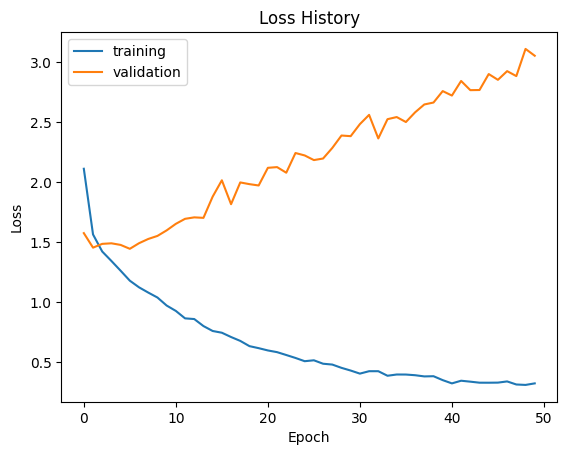

In [ ]:
loss = history5.history["loss"]
val_loss = history5.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

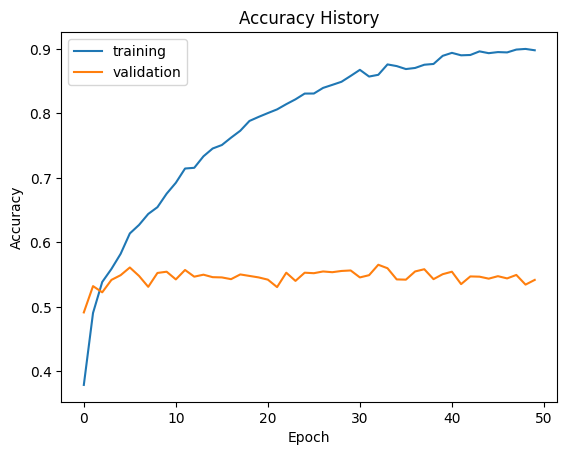

In [ ]:
accuracy = history5.history["accuracy"]
val_accuracy = history5.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# resnet50 with data augmentation
resnet50_aug = tf.keras.models.Sequential()

resnet50_pretrained = tf.keras.applications.ResNet50(include_top = False, input_shape = (160,160, 3), pooling = 'avg', classes = len(key), weights = "imagenet")

for layer in resnet50_pretrained.layers:
  layer.trainable = False

resnet50_aug.add(resnet50_pretrained)
resnet50_aug.add(keras.layers.Flatten())
resnet50_aug.add(keras.layers.Dense(512, activation = 'relu'))
resnet50_aug.add(keras.layers.Dense(15, activation = 'softmax'))

resnet50_aug.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history6 = resnet50_aug.fit(train_generator, validation_data = (images_validate, labels_validate), shuffle = True, epochs = 50)

Epoch 1/50
313/313 [==============================] - 79s 236ms/step - loss: 1.7542 - accuracy: 0.4434 - val_loss: 1.5188 - val_accuracy: 0.5085
Epoch 2/50
313/313 [==============================] - 70s 223ms/step - loss: 1.4182 - accuracy: 0.5399 - val_loss: 1.3641 - val_accuracy: 0.5608
Epoch 3/50
313/313 [==============================] - 69s 219ms/step - loss: 1.3231 - accuracy: 0.5581 - val_loss: 1.3171 - val_accuracy: 0.5785
Epoch 4/50
313/313 [==============================] - 70s 223ms/step - loss: 1.2385 - accuracy: 0.5879 - val_loss: 1.3163 - val_accuracy: 0.5904
Epoch 5/50
313/313 [==============================] - 70s 224ms/step - loss: 1.1732 - accuracy: 0.6047 - val_loss: 1.3536 - val_accuracy: 0.5685
Epoch 6/50
313/313 [==============================] - 71s 227ms/step - loss: 1.1168 - accuracy: 0.6319 - val_loss: 1.3486 - val_accuracy: 0.5819
Epoch 7/50
313/313 [==============================] - 71s 228ms/step - loss: 1.0663 - accuracy: 0.6470 - val_loss: 1.2737 - val_ac

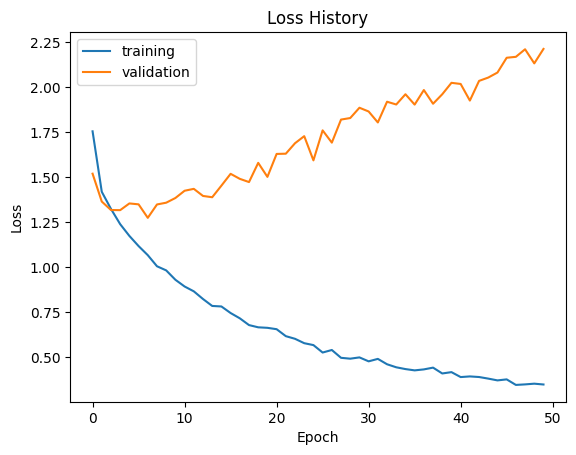

In [ ]:
loss = history6.history["loss"]
val_loss = history6.history["val_loss"]
plt.title('Loss History')
plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

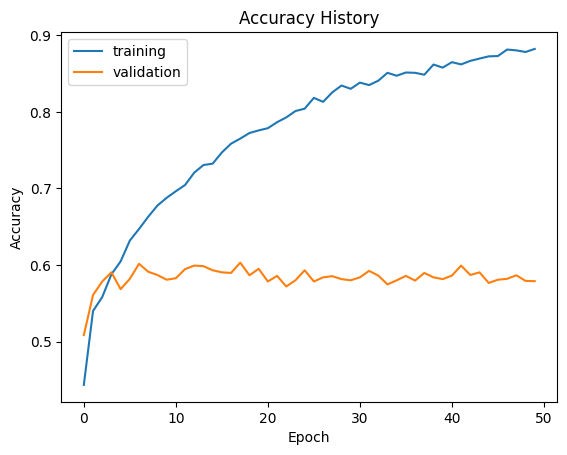

In [ ]:
accuracy = history6.history["accuracy"]
val_accuracy = history6.history["val_accuracy"]
plt.title('Accuracy History')
plt.plot(accuracy, label = "training")
plt.plot(val_accuracy, label = "validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

[1] https://www.v7labs.com/blog/human-activity-recognition <br>
[2] https://www.mdpi.com/1424-8220/23/14/6384